In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# 3. Statistical Experiments and Significance Testing

Design of experiments is a cornerstone of the practice of statistics, with applications in virtually all areas of research. The goal is to design an experiment in order to confirm or reject a hypothesis. Data scientists often need to conduct continual experiments, particularly regarding user interface and product marketing.

#### A/B Testing

An A/B test is an experiment with two groups to establish which of two treatments, products, prcedures, or the like is superior. Often one of the two treatments is the standard existing treatment, or no treatment. If a standard (or no) treatment is used, it is called _control_. A typical hypothesis is that a new treatment is better than the control.


<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Treatment</td>
        <td>Something (drug, price, web headline) to which a subject is exposed.</td>
    </tr>
    <tr>
        <td>Treatment group</td>
        <td>A group of subjects exposed to a specific treatment</td>
    </tr>
    <tr>
        <td>Control group</td>
        <td>A group of subjects exposed to no (or standard) treatment</td>
    </tr>
    <tr>
        <td>Randomization</td>
        <td>The process of randomly assigning subjects to treatments</td>
    </tr>
    <tr>
        <td>Subjects</td>
        <td>The items (web visitor, patients, etc.) that are exposed to treatments</td>
    </tr>
    <tr>
        <td>Test statistic</td>
        <td>The metric used to measure the effect of the treatment</td>
    </tr>
</table>

A/B testing are common in web design and marketing, since results are so readily measured.

#### Hypothesis Tests

Hypothesis tests, also called _significance tests_, are ubiquitous in the traditional statistical analysis of published research. Their purpose is to help you to learn whether random chance might be responsible for an observed effect.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Null hypothesis</td>
        <td>The hypothesis tha chance is to blame.</td>
    </tr>
    <tr>
        <td>Alternative hypothesis</td>
        <td>Counterpoint to the null (what you hope to prove)</td>
    </tr>
    <tr>
        <td>One-way test</td>
        <td>Hypothesis test that counts chance results only in one direction</td>
    </tr>
    <tr>
        <td>Two-way test</td>
        <td>Hypothesis test that counts chance results in two directions</td>
    </tr>
</table>

#### The Null Hypothesis

Hypothesis tests use the following logic: "Given the human tendency to react to unusual but random behavior and interpret it as something meaningful and real, in our experiments we will require proof that the difference between groups is more extreme than what chance might reasonably produce." This involves a baseline assumption that the treatments are equivalent, and any difference between the groups is due tochance. This baseline assumption is termed the _null hypothesis_. Our hope, then is that we can in fact prove the null hypothesis _wrong_ and show that outcomes for groups A and B are more different than what chance might produce.

#### Alternative Hypothesis

Hypothesis tests by their nature involve not just a null hypothesis but also an offsetting alternative hypothesis.

* NULL = "no difference between means of group A and B"; alternative = "A is different from B"
* NULL = "A <= B"; alternative = "A > B"
* NULL = "B is not X% greater then A"; alternative = "B is X% greater than A"

Taken together, the null and alternative hypothesis must account for all possibilities. The nature of the null hypothesis determines the structure of the hypothesis test.

#### Resampling

_Resampling_ in statistics means to repeatedly sample values from observed data, with a general goal f assessing random variability in statistic. It can also be used to assess and improve accuracy of some machine-learning models.


<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Permuattion test</td>
        <td>The procedure of combining two r more samples together and randomly (or exhaustively) reallocating the observations to resample.</td>
    </tr>
    <tr>
        <td>Resampling</td>
        <td>Drawing additional samples ("resamples") from an observed data set.</td>
    </tr>
    <tr>
        <td>With or without replacement</td>
        <td>In sampling, whether or not an item is returned to the sample before the next draw.</td>
    </tr>
</table>

#### Permutation test

In a _permutation_ procedure, two or more samples are involved, typically the groups in an A/B or other hypothesis tests. _Permute_ means to change the order of a set of values. The first step in a _permutation test_ of a hypothesis is to combine the results from groups A and B (and, if used C, D, ...). This is the logical embodiment of the null hypothesis that the treatments to which the groups were exposed do not differ. We then test that hypothesis by randomly drawing groups from this combined set and seeing how much they differ from one another.


In [2]:
# Example of a permutation test
session_times = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/web_page_data.csv")
session_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


Text(0.5, 0.98, '')

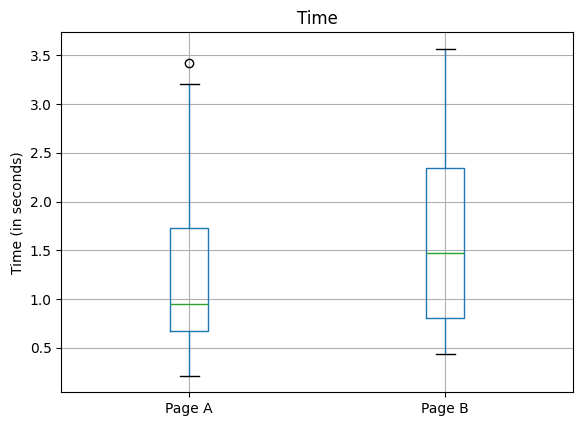

In [3]:
ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

In [4]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(f'Difference between means: {mean_b - mean_a:.4f}')

Difference between means: 0.3567


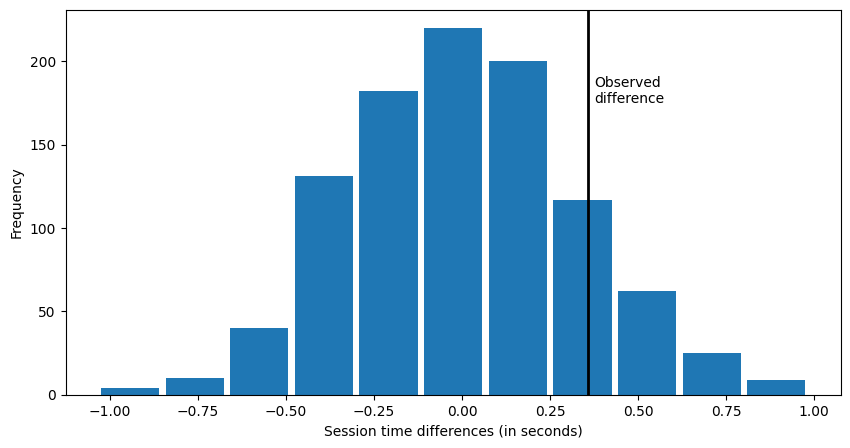

In [27]:
# Page B has session times grater than those of page A by 35.67 seconds, on average. The question
# is whether this difference is within tha range of what random chance might produce. One way to
# answer this is to apply a permutation test - combine all session times together and then repeatedly
# shuffle and divide them into groups.
import random

def perm_fun(x, nA, nB):
	n = nA + nB
	idx_B = set(random.sample(range(n), nB))
	idx_A = set(range(n)) - idx_B
	return x.loc[list(idx_B)].mean()  - x.loc[list(idx_A)].mean()

# This function works by sampling (without replacements) nB indices and assigning them to the
# B group; the renaming nA indices are assigned to group A. The difference between the two means
# is returned. Calling R=1000 times leads to a distribution of differences int the session times
# that can be plotted as a histogram

perm_diffs = [perm_fun(session_times.Time, 21, 15) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=mean_b - mean_a, color='black', lw=2)
ax.text(0.375, 175, 'Observed\ndifference')
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')
plt.show()

In [29]:
print(np.mean(perm_diffs > mean_b - mean_a))

0.137
